In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Ddos Evaluation/Kods/archive (2)/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")

In [ ]:
df

Flow ID       Source IP   Source Port  \
0       192.168.10.5-104.16.207.165-54865-443-6  104.16.207.165           443   
1         192.168.10.5-104.16.28.216-55054-80-6   104.16.28.216            80   
2         192.168.10.5-104.16.28.216-55055-80-6   104.16.28.216            80   
3       192.168.10.16-104.17.241.25-46236-443-6   104.17.241.25           443   
4       192.168.10.5-104.19.196.102-54863-443-6  104.19.196.102           443   
...                                         ...             ...           ...   
225740     192.168.10.15-72.21.91.29-61374-80-6     72.21.91.29            80   
225741     192.168.10.15-72.21.91.29-61378-80-6     72.21.91.29            80   
225742     192.168.10.15-72.21.91.29-61375-80-6     72.21.91.29            80   
225743    192.168.10.15-8.41.222.187-61323-80-6    8.41.222.187            80   
225744      192.168.10.15-8.43.72.21-61326-80-6      8.43.72.21            80   

        Destination IP   Destination Port   Protocol      Timestamp  \
0         192.168.10.5              54865          6  7/7/2017 3:30   
1         192.168.10.5              55054          6  7/7/2017 3:30   
2         192.168.10.5              55055          6  7/7/2017 3:30   
3        192.168.10.16              46236          6  7/7/2017 3:30   
4         192.168.10.5              54863          6  7/7/2017 3:30   
...                ...                ...        ...            ...   
225740   192.168.10.15              61374          6  7/7/2017 5:02   
225741   192.168.10.15              61378          6  7/7/2017 5:02   
225742   192.168.10.15              61375          6  7/7/2017 5:02   
225743   192.168.10.15              61323          6  7/7/2017 5:02   
225744   192.168.10.15              61326          6  7/7/2017 5:02   

         Flow Duration   Total Fwd Packets   Total Backward Packets  ...  \
0                    3                   2                        0  ...   
1                  109                   1                        1  ...   
2                   52                   1                        1  ...   
3                   34                   1                        1  ...   
4                    3                   2                        0  ...   
...                ...                 ...                      ...  ...   
225740              61                   1                        1  ...   
225741              72                   1                        1  ...   
225742              75                   1                        1  ...   
225743              48                   2                        0  ...   
225744              68                   1                        1  ...   

         min_seg_size_forward  Active Mean   Active Std   Active Max  \
0                          20          0.0          0.0            0   
1                          20          0.0          0.0            0   
2                          20          0.0          0.0            0   
3                          20          0.0          0.0            0   
4                          20          0.0          0.0            0   
...                       ...          ...          ...          ...   
225740                     20          0.0          0.0            0   
225741                     20          0.0          0.0            0   
225742                     20          0.0          0.0            0   
225743                     20          0.0          0.0            0   
225744                     20          0.0          0.0            0   

         Active Min  Idle Mean   Idle Std   Idle Max   Idle Min   Label  
0                 0        0.0        0.0          0          0  BENIGN  
1                 0        0.0        0.0          0          0  BENIGN  
2                 0        0.0        0.0          0          0  BENIGN  
3                 0        0.0        0.0          0          0  BENIGN  
4                 0        0.0        0.0          0          0  B

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225745 entries, 0 to 225744
Data columns (total 85 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Flow ID                       225745 non-null  object 
 1    Source IP                    225745 non-null  object 
 2    Source Port                  225745 non-null  int64  
 3    Destination IP               225745 non-null  object 
 4    Destination Port             225745 non-null  int64  
 5    Protocol                     225745 non-null  int64  
 6    Timestamp                    225745 non-null  object 
 7    Flow Duration                225745 non-null  int64  
 8    Total Fwd Packets            225745 non-null  int64  
 9    Total Backward Packets       225745 non-null  int64  
 10  Total Length of Fwd Packets   225745 non-null  int64  
 11   Total Length of Bwd Packets  225745 non-null  int64  
 12   Fwd Packet Length Max        225745 non-nul

In [ ]:
df.columns

Index(['Flow ID', ' Source IP', ' Source Port', ' Destination IP',
       ' Destination Port', ' Protocol', ' Timestamp', ' Flow Duration',
       ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Length', ' Max Pa

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Flow ID              0
 Source IP           0
 Source Port         0
 Destination IP      0
 Destination Port    0
                    ..
Idle Mean            0
 Idle Std            0
 Idle Max            0
 Idle Min            0
 Label               0
Length: 85, dtype: int64


In [ ]:

columns_with_missing_values = []
for column, count in missing_values.items():
    if count > 0:
        columns_with_missing_values.append(column)

# Print columns with missing values
print("Columns with Missing Values:")
for column in columns_with_missing_values:
    print(f"{column}: {missing_values[column]} missing values")

Columns with Missing Values:
Flow Bytes/s: 4 missing values


In [ ]:

df = df.dropna()

In [ ]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
         Source Port   Destination Port       Protocol   Flow Duration  \
count  225741.000000      225741.000000  225741.000000    2.257410e+05   
mean    38257.692732        8879.294213       7.600316    1.624194e+07   
std     23057.356587       19754.491905       3.881615    3.152458e+07   
min         0.000000           0.000000       0.000000   -1.000000e+00   
25%     18990.000000          80.000000       6.000000    7.118300e+04   
50%     49799.000000          80.000000       6.000000    1.452362e+06   
75%     58296.000000          80.000000       6.000000    8.805245e+06   
max     65534.000000       65532.000000      17.000000    1.199999e+08   

        Total Fwd Packets   Total Backward Packets  \
count       225741.000000            225741.000000   
mean             4.874972                 4.572851   
std             15.423004                21.755541   
min              1.000000                 0.000000   
25%              2.000000                 

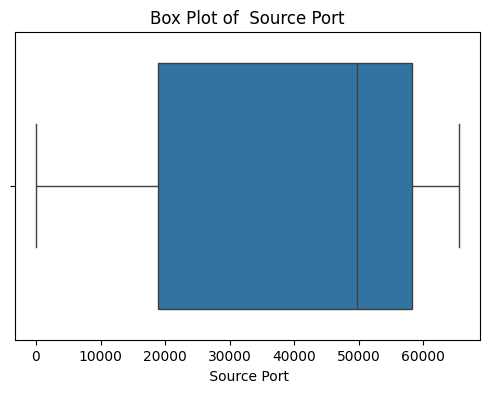

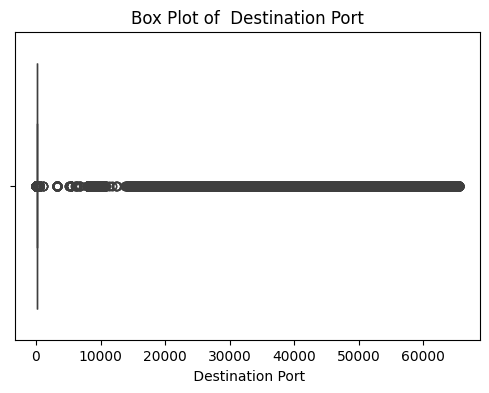

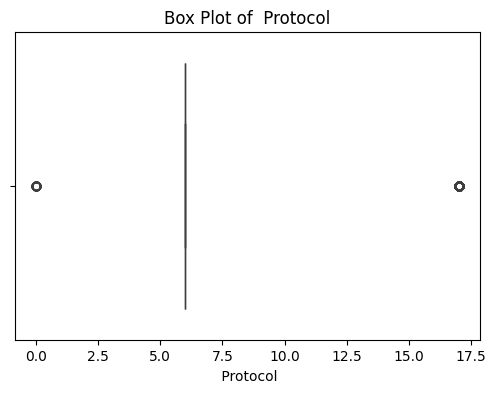

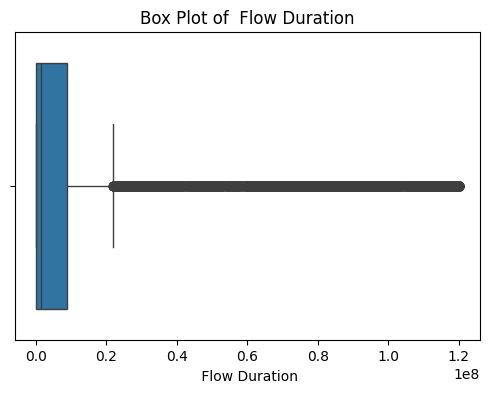

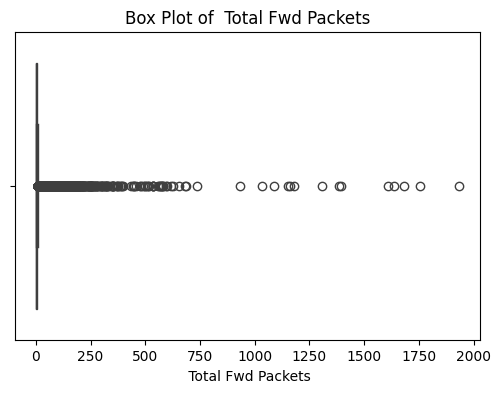

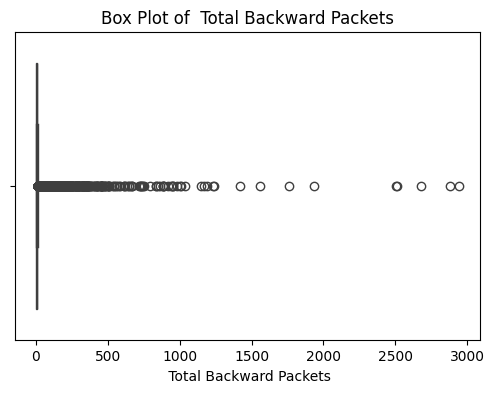

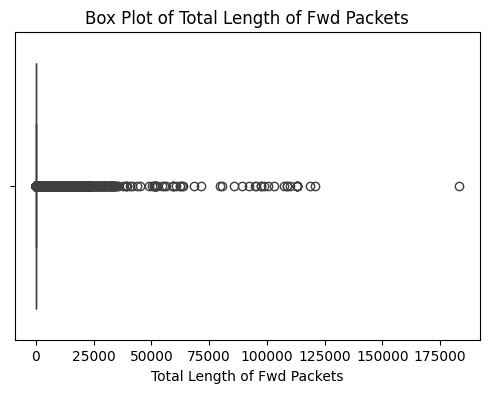

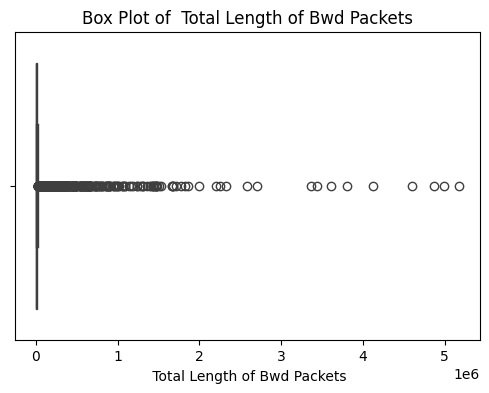

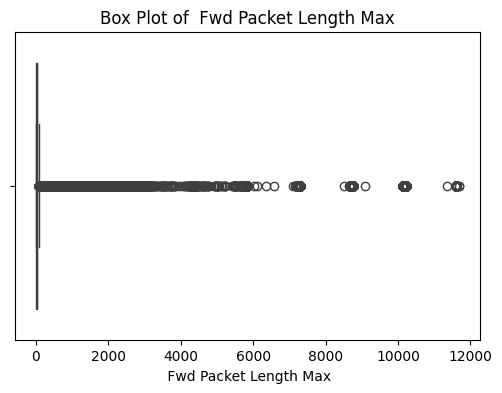

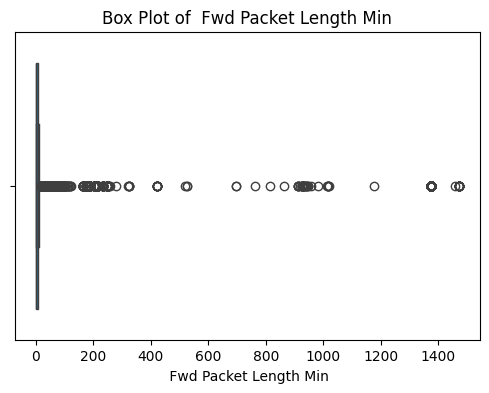

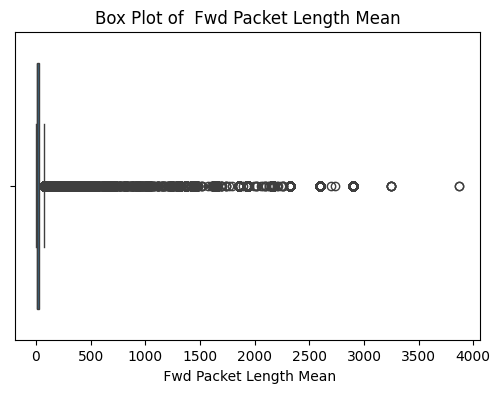

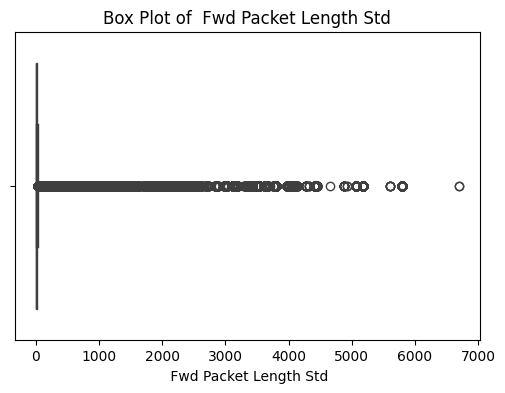

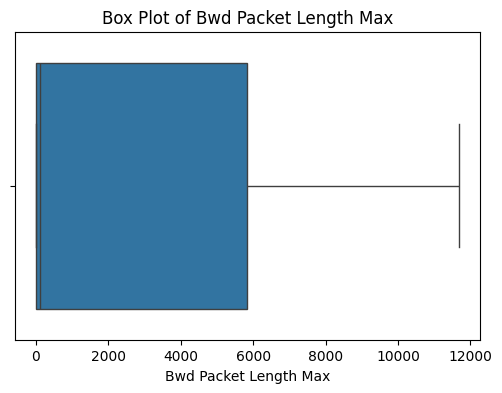

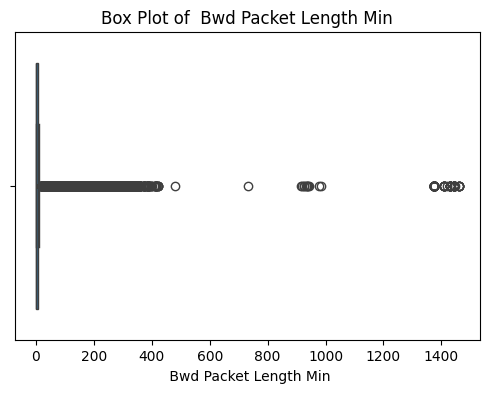

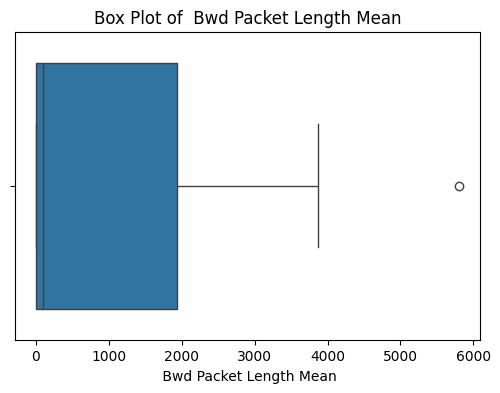

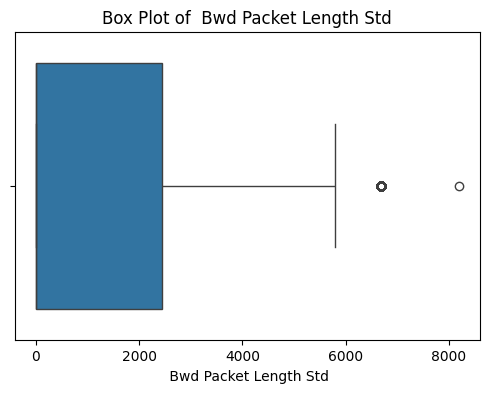

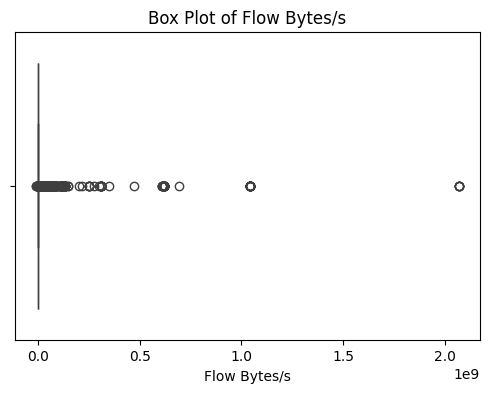

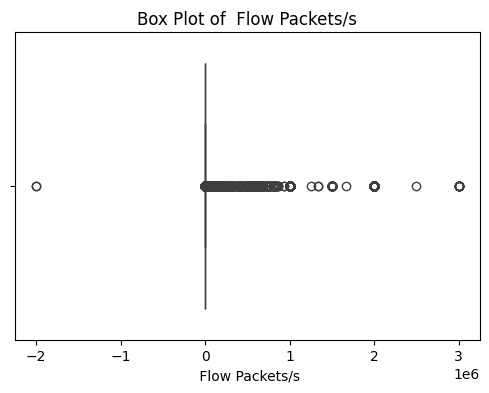

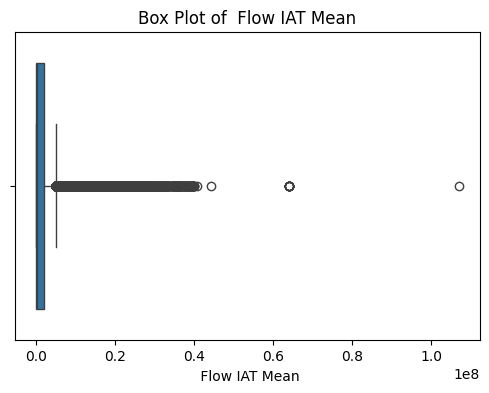

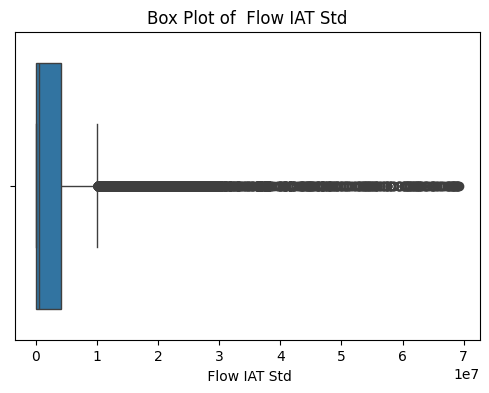

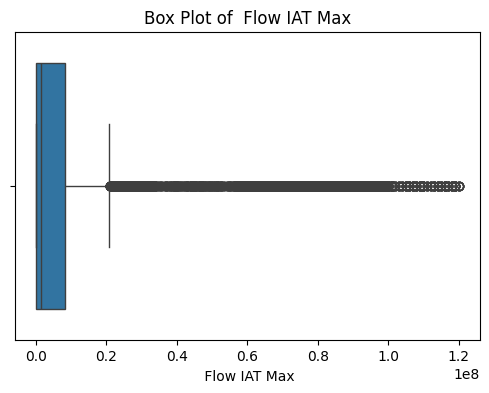

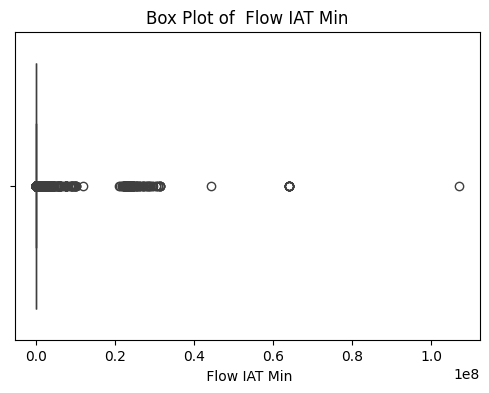

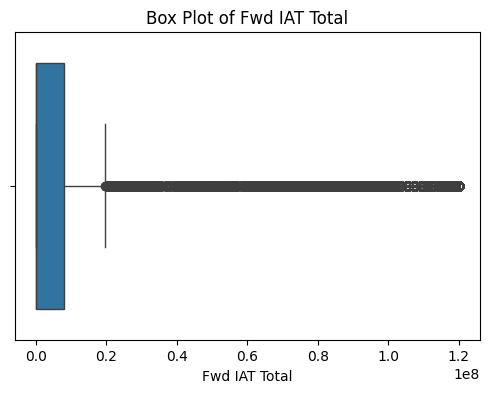

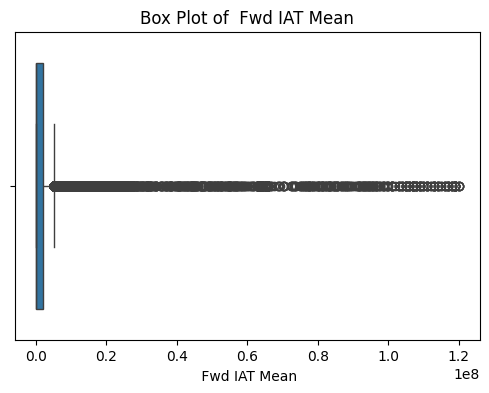

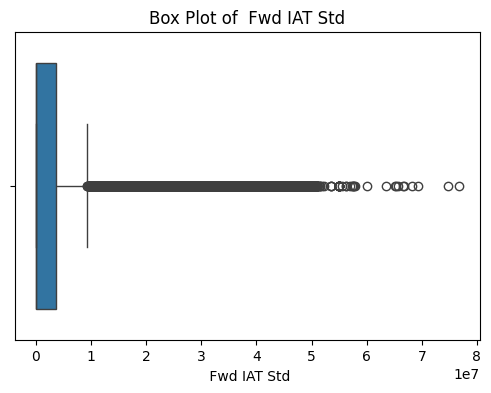

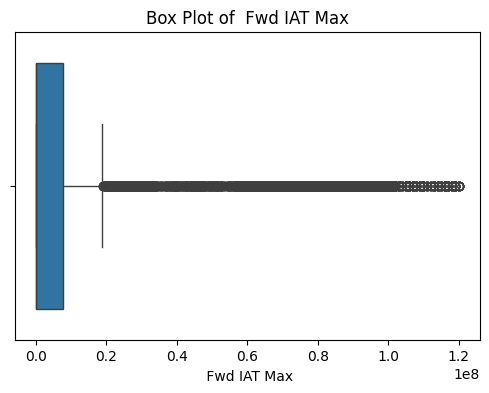

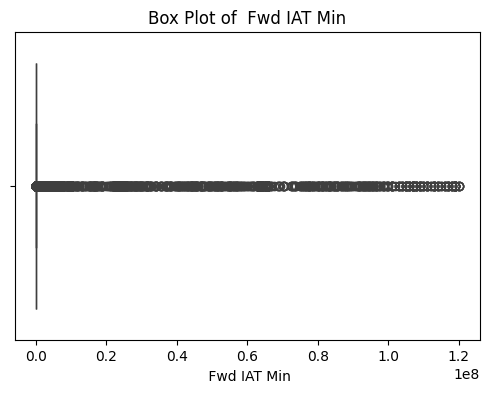

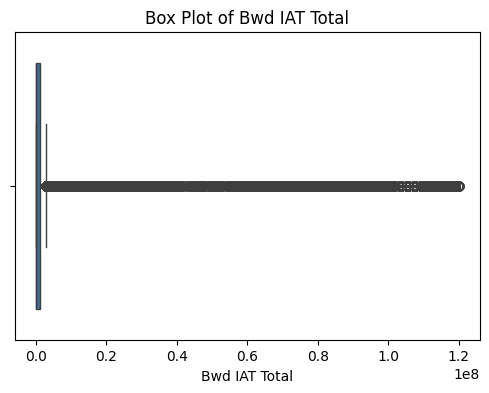

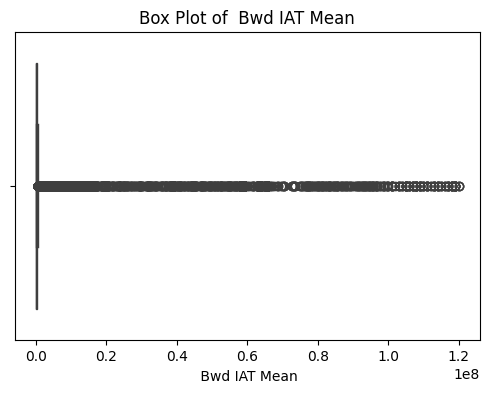

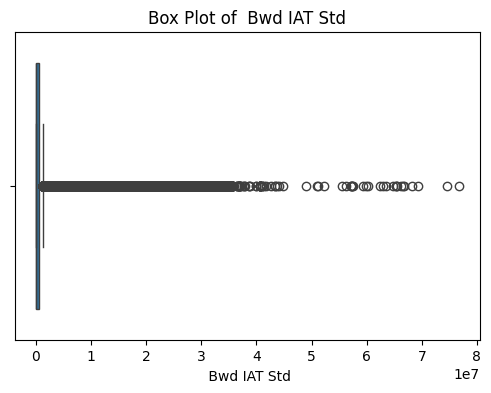

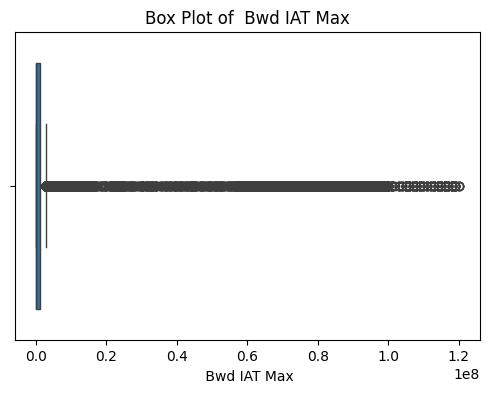

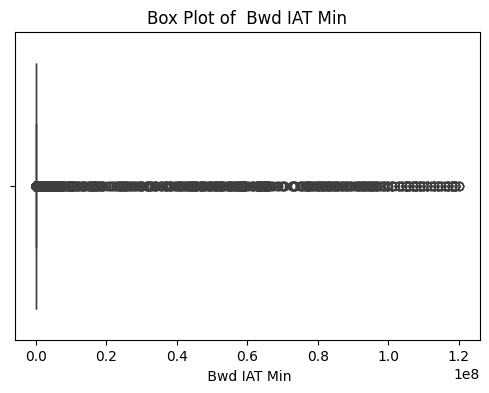

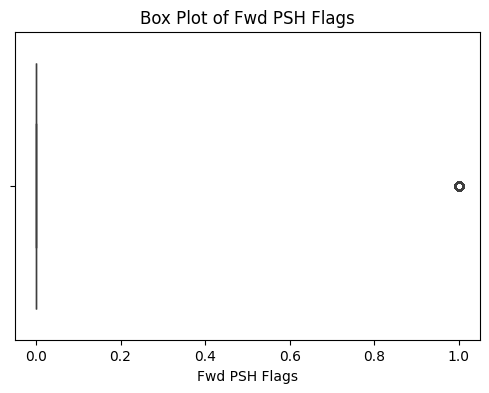

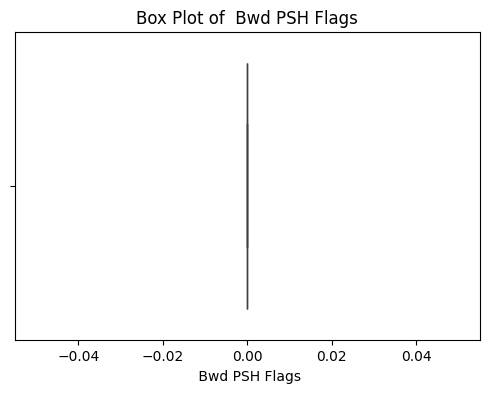

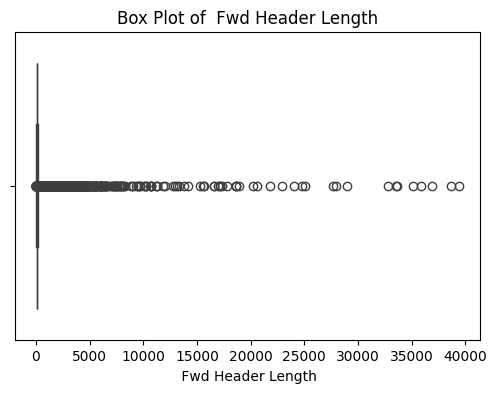

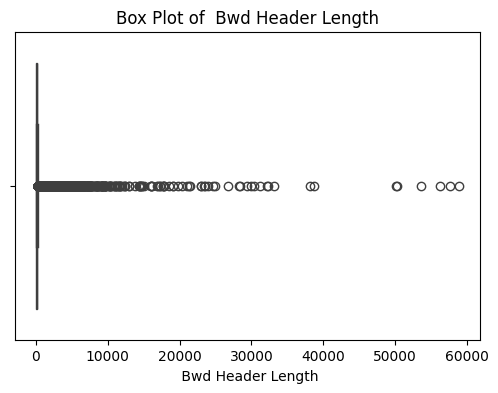

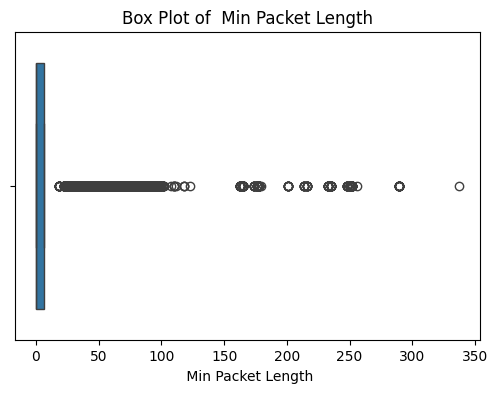

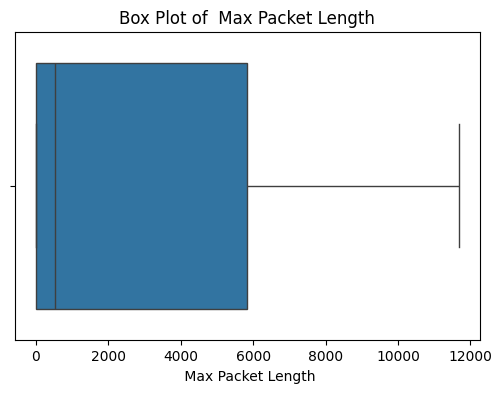

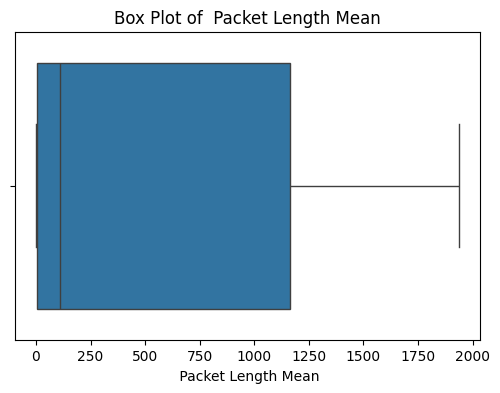

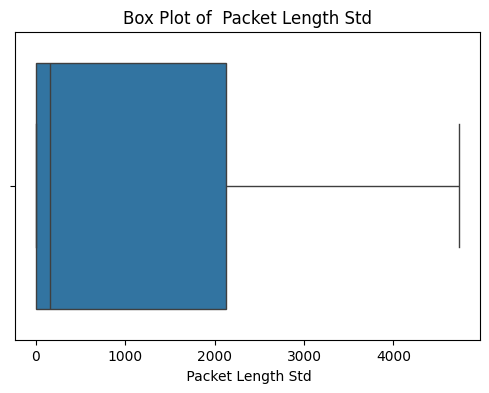

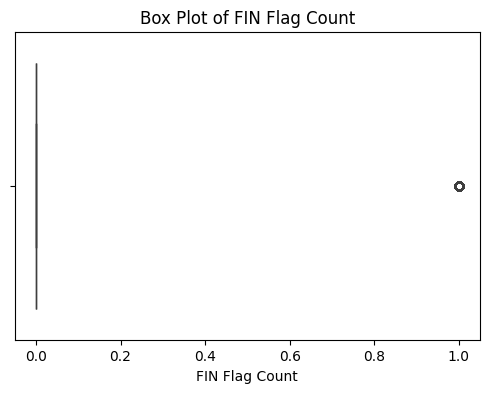

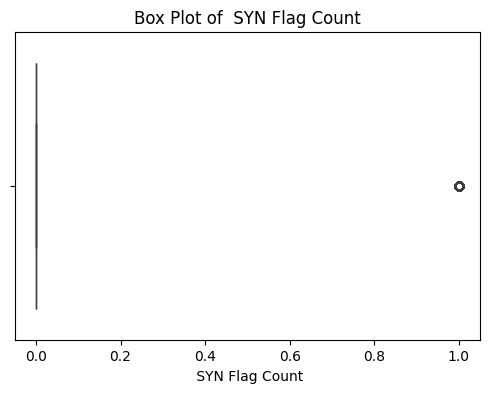

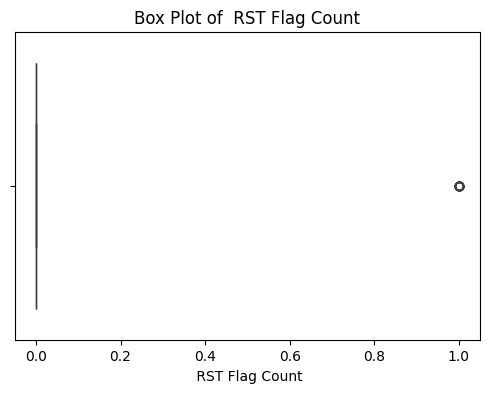

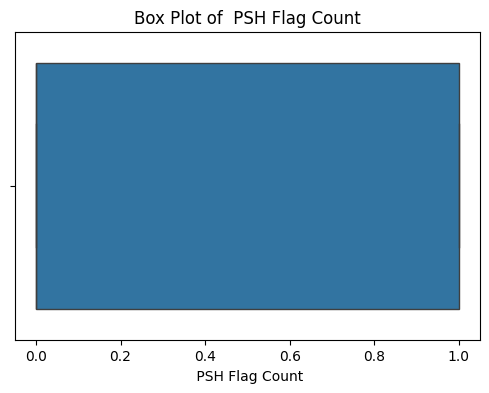

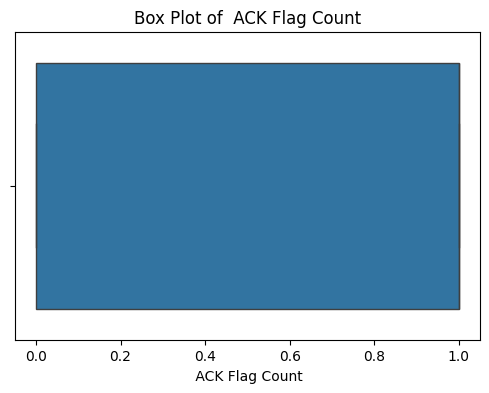

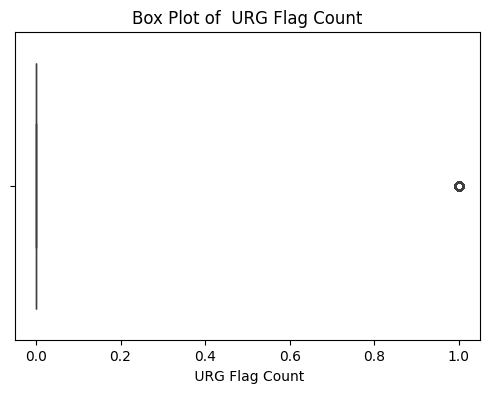

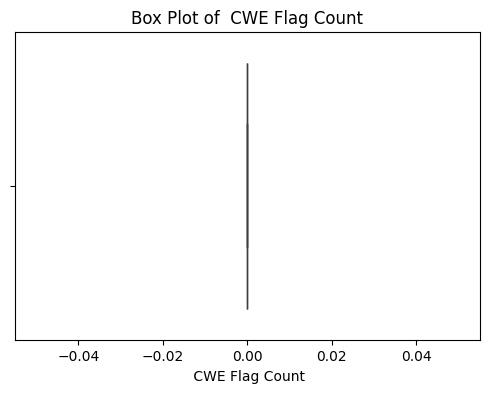

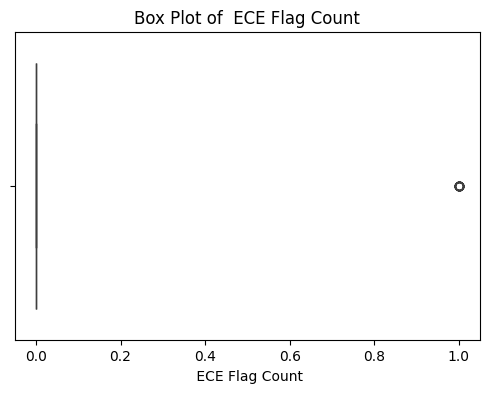

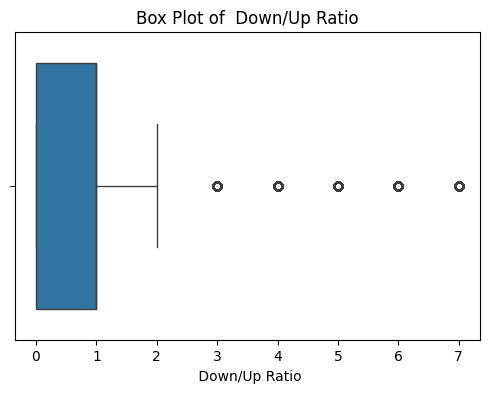

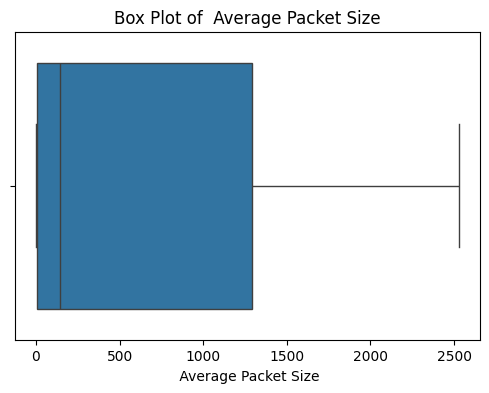

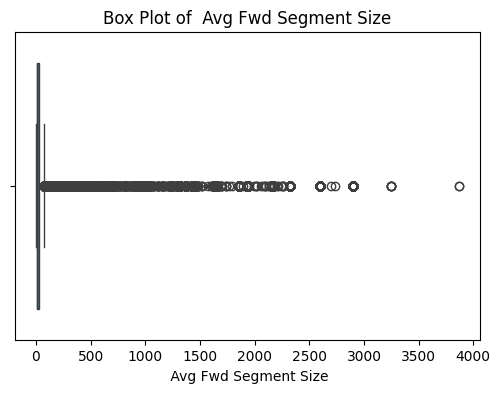

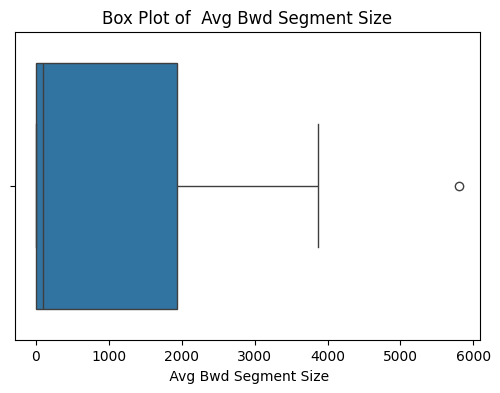

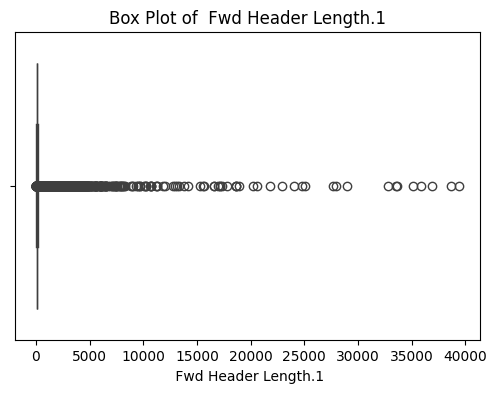

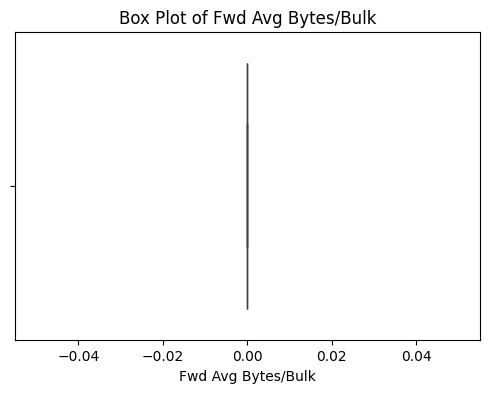

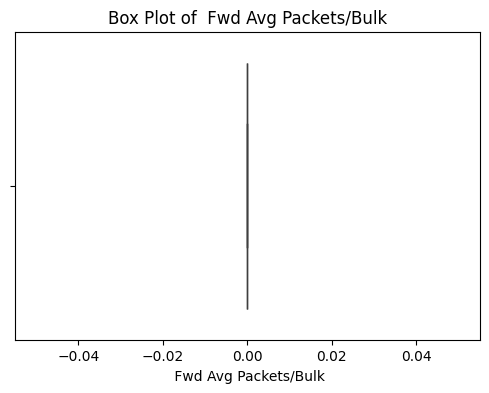

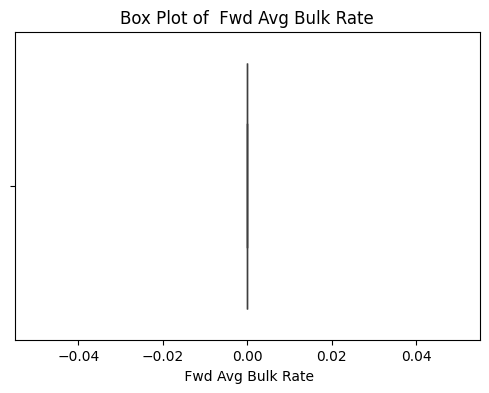

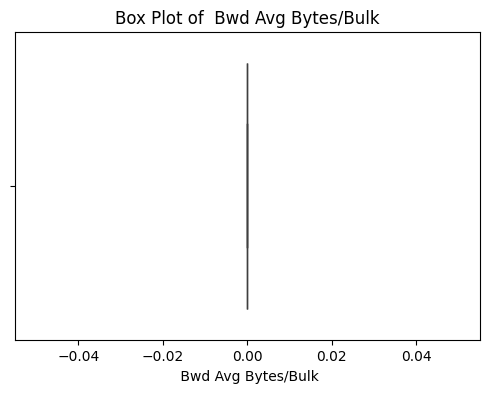

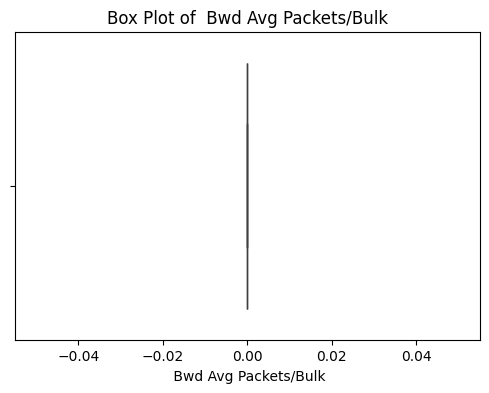

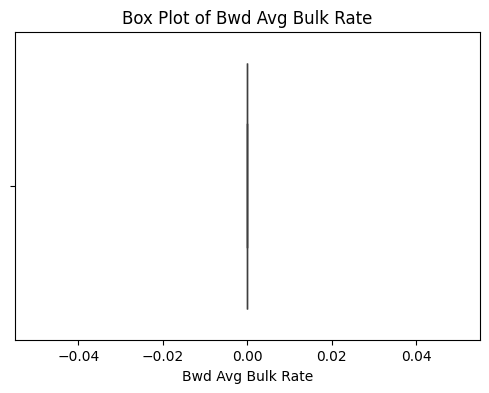

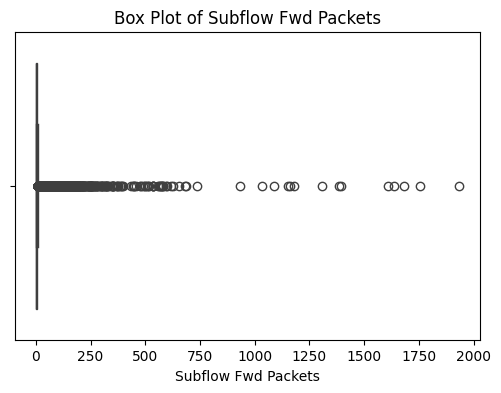

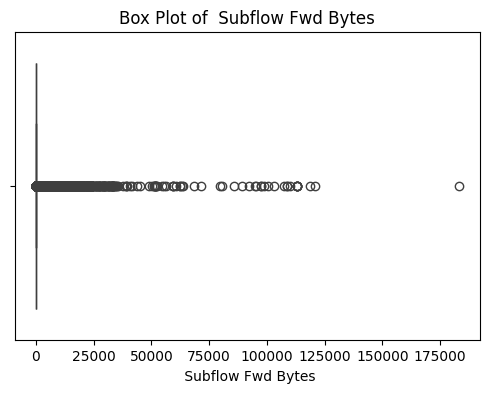

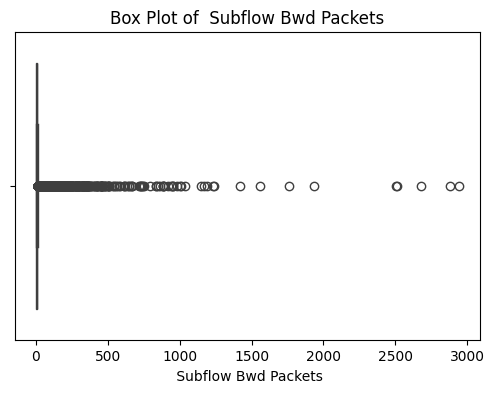

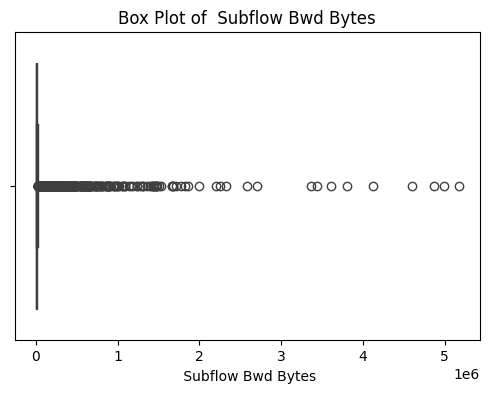

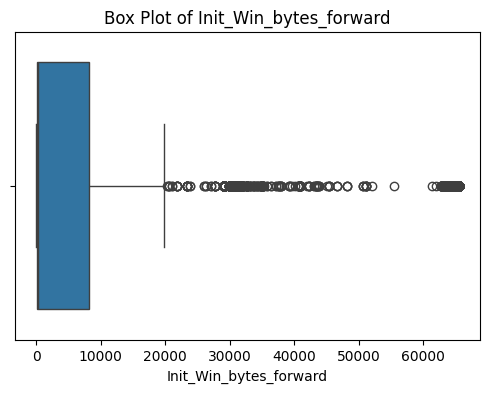

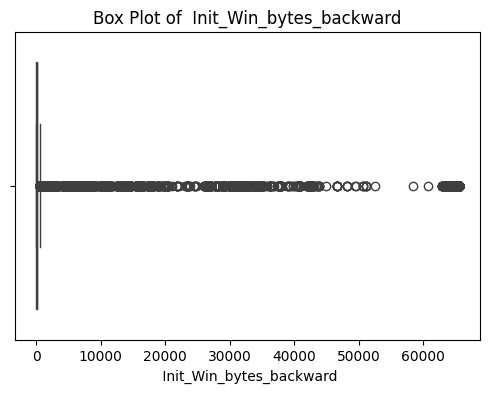

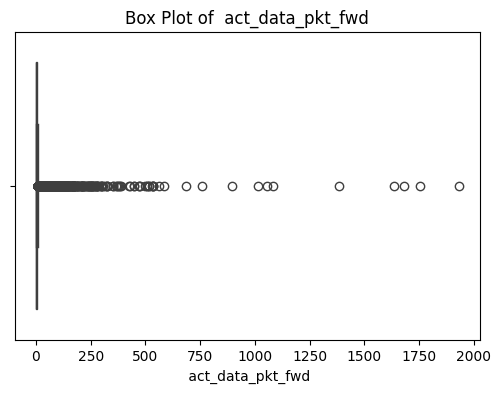

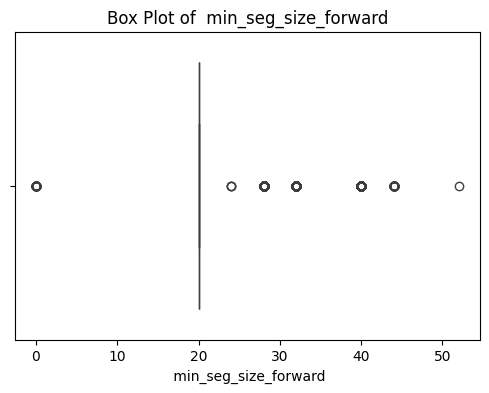

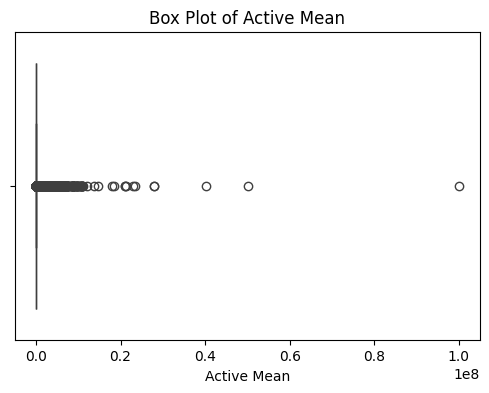

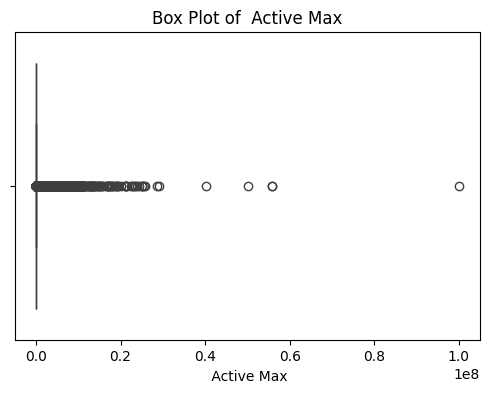

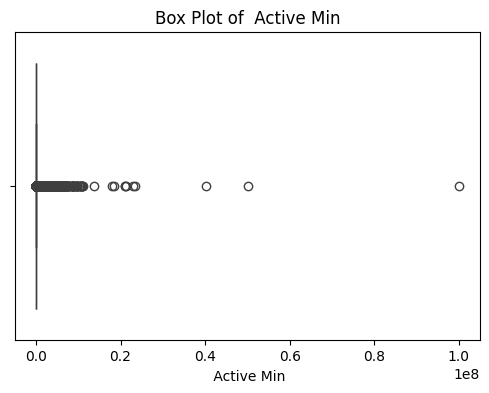

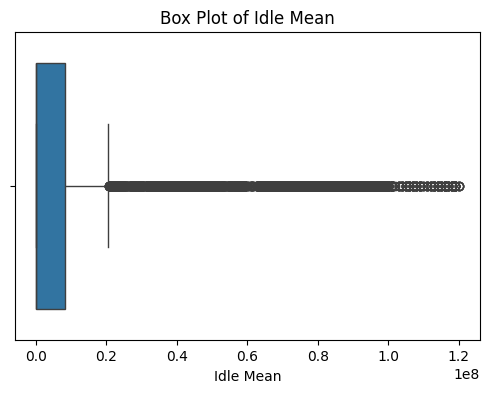

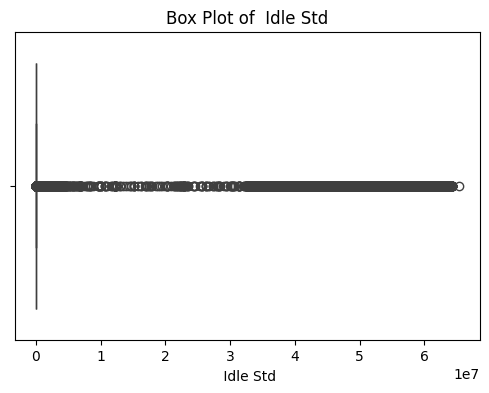

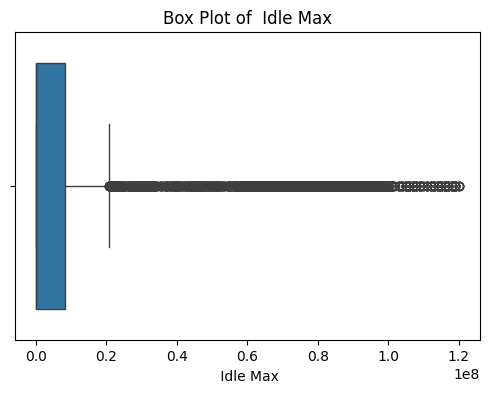

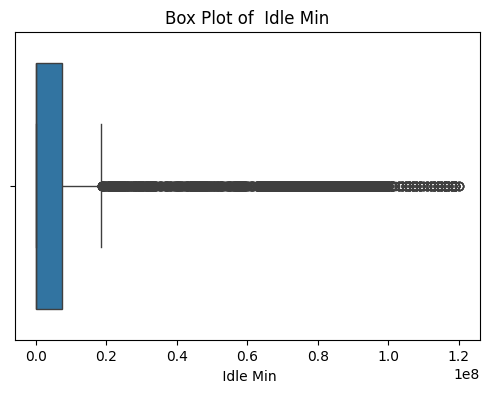

In [ ]:
numeric_cols = df.select_dtypes(include=np.number).columns
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x=col)
    plt.title(f'Box Plot of {col}')
    plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 225741 entries, 0 to 225744
Data columns (total 84 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Source IP                    225741 non-null  object 
 1    Source Port                  225741 non-null  int64  
 2    Destination IP               225741 non-null  object 
 3    Destination Port             225741 non-null  int64  
 4    Protocol                     225741 non-null  int64  
 5    Timestamp                    225741 non-null  object 
 6    Flow Duration                225741 non-null  int64  
 7    Total Fwd Packets            225741 non-null  int64  
 8    Total Backward Packets       225741 non-null  int64  
 9   Total Length of Fwd Packets   225741 non-null  int64  
 10   Total Length of Bwd Packets  225741 non-null  int64  
 11   Fwd Packet Length Max        225741 non-null  int64  
 12   Fwd Packet Length Min        225741 non-null  in

In [ ]:
label_encoder = LabelEncoder()

# Encode the 'Source IP' column
df[' Source IP'] = label_encoder.fit_transform(df[' Source IP'])

# Encode the 'Destination IP' column
df[' Destination IP'] = label_encoder.fit_transform(df[' Destination IP'])

# Encode the 'Label' column (assuming 'DDoS' is 1 and 'Benign' is 0)
df[' Label'] = label_encoder.fit_transform(df[' Label'])

In [ ]:
df

Source IP   Source Port   Destination IP   Destination Port  \
0               22           443              866              54865   
1               37            80              866              55054   
2               37            80              866              55055   
3               45           443              860              46236   
4               49           443              866              54863   
...            ...           ...              ...                ...   
225740        1925            80              859              61374   
225741        1925            80              859              61378   
225742        1925            80              859              61375   
225743        1983            80              859              61323   
225744        1986            80              859              61326   

         Protocol      Timestamp   Flow Duration   Total Fwd Packets  \
0               6  7/7/2017 3:30               3                   2   
1               6  7/7/2017 3:30             109                   1   
2               6  7/7/2017 3:30              52                   1   
3               6  7/7/2017 3:30              34                   1   
4               6  7/7/2017 3:30               3                   2   
...           ...            ...             ...                 ...   
225740          6  7/7/2017 5:02              61                   1   
225741          6  7/7/2017 5:02              72                   1   
225742          6  7/7/2017 5:02              75                   1   
225743          6  7/7/2017 5:02              48                   2   
225744          6  7/7/2017 5:02              68                   1   

         Total Backward Packets  Total Length of Fwd Packets  ...  \
0                             0                           12  ...   
1                             1                            6  ...   
2                             1                            6  ...   
3                             1                            6  ...   
4                             0                           12  ...   
...                         ...                          ...  ...   
225740                        1                            6  ...   
225741                        1                            6  ...   
225742                        1                            6  ...   
225743                        0                           12  ...   
225744                        1                            6  ...   

         min_seg_size_forward  Active Mean   Active Std   Active Max  \
0                          20          0.0          0.0            0   
1                          20          0.0          0.0            0   
2                          20          0.0          0.0            0   
3                          20          0.0          0.0            0   
4                          20          0.0          0.0            0   
...                       ...          ...          ...          ...   
225740                     20          0.0          0.0            0   
225741                     20          0.0          0.0            0   
225742                     20          0.0          0.0            0   
225743                     20          0.0          0.0            0   
225744                     20          0.0          0.0            0   

         Active Min  Idle Mean   Idle Std   Idle Max   Idle Min   Label  
0                 0        0.0        0.0          0          0       0  
1                 0        0.0        0.0          0          0       0  
2                 0        0.0        0.0          0          0       0  
3                 0        0.0        0.0          0          0       0  
4                 0        0.0        0.0          0          0       0  
...             ...        ...        ...        ...        ...     ...  
225740            0        0.0        0.0          0          0    

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 225741 entries, 0 to 225744
Data columns (total 84 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Source IP                    225741 non-null  int64  
 1    Source Port                  225741 non-null  int64  
 2    Destination IP               225741 non-null  int64  
 3    Destination Port             225741 non-null  int64  
 4    Protocol                     225741 non-null  int64  
 5    Timestamp                    225741 non-null  object 
 6    Flow Duration                225741 non-null  int64  
 7    Total Fwd Packets            225741 non-null  int64  
 8    Total Backward Packets       225741 non-null  int64  
 9   Total Length of Fwd Packets   225741 non-null  int64  
 10   Total Length of Bwd Packets  225741 non-null  int64  
 11   Fwd Packet Length Max        225741 non-null  int64  
 12   Fwd Packet Length Min        225741 non-null  in

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sadece sayısal sütunları seçin
numeric_df = df.select_dtypes(include=[float, int])

# Korelasyon matrisini oluşturun
correlation_matrix = numeric_df.corr()

# Isı haritasını oluşturun ve gösterin
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [ ]:

X = df.drop(' Label', axis=1)  # Drop the 'Label' column to get the features
y = df[' Label']  # Select the 'Label' column as the target variable


rus = RandomUnderSampler(random_state=42)


X_downsampled, y_downsampled = rus.fit_resample(X, y)

# Check the class distribution
print(y_downsampled.value_counts())

 Label
0    97714
1    97714
Name: count, dtype: int64


In [ ]:
y=y_downsampled
y

0         0
1         0
2         0
3         0
4         0
         ..
195423    1
195424    1
195425    1
195426    1
195427    1
Name:  Label, Length: 195428, dtype: int64

In [ ]:

X = X_downsampled.replace([np.inf, -np.inf], np.nan).fillna(0)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Sadece sayısal sütunları seçin
numeric_X = X.select_dtypes(include=[float, int])

# StandardScaler'ı kullanarak sayısal sütunları ölçeklendirin
scaler = StandardScaler()
X_scaled = scaler.fit_transform(numeric_X)

# X_scaled sonuçlarını DataFrame olarak geri dönüştürebilirsiniz (isteğe bağlı)
X_scaled_df = pd.DataFrame(X_scaled, columns=numeric_X.columns)

print(X_scaled_df.head())


    Source IP   Source Port   Destination IP   Destination Port   Protocol  \
0   -2.749381     -1.537481         0.016074           2.134811  -0.449064   
1   -2.674824     -1.552732         0.016074           2.143853  -0.449064   
2   -2.674824     -1.552732         0.016074           2.143901  -0.449064   
3   -2.635060     -1.537481        -0.002505           1.721974  -0.449064   
4   -2.615178     -1.537481         0.016074           2.134715  -0.449064   

    Flow Duration   Total Fwd Packets   Total Backward Packets  \
0       -0.510084           -0.177386                -0.204462   
1       -0.510081           -0.237779                -0.161643   
2       -0.510083           -0.237779                -0.161643   
3       -0.510083           -0.237779                -0.161643   
4       -0.510084           -0.177386                -0.204462   

   Total Length of Fwd Packets   Total Length of Bwd Packets  ...  \
0                    -0.307750                     -0.136306  ...

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler


numeric_X = X.select_dtypes(include=[float, int])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(numeric_X)


X_scaled_df = pd.DataFrame(X_scaled, columns=numeric_X.columns)

print(X_scaled_df.head())


    Source IP   Source Port   Destination IP   Destination Port   Protocol  \
0   -2.749381     -1.537481         0.016074           2.134811  -0.449064   
1   -2.674824     -1.552732         0.016074           2.143853  -0.449064   
2   -2.674824     -1.552732         0.016074           2.143901  -0.449064   
3   -2.635060     -1.537481        -0.002505           1.721974  -0.449064   
4   -2.615178     -1.537481         0.016074           2.134715  -0.449064   

    Flow Duration   Total Fwd Packets   Total Backward Packets  \
0       -0.510084           -0.177386                -0.204462   
1       -0.510081           -0.237779                -0.161643   
2       -0.510083           -0.237779                -0.161643   
3       -0.510083           -0.237779                -0.161643   
4       -0.510084           -0.177386                -0.204462   

   Total Length of Fwd Packets   Total Length of Bwd Packets  ...  \
0                    -0.307750                     -0.136306  ...

In [ ]:

selector = VarianceThreshold(threshold=0)


selector.fit(X_scaled_df)


non_constant_indices = selector.get_support(indices=True)


X_non_constant = X_scaled_df.iloc[:, non_constant_indices]

In [ ]:
X_non_constant

Source IP   Source Port   Destination IP   Destination Port  \
0        -2.749381     -1.537481         0.016074           2.134811   
1        -2.674824     -1.552732         0.016074           2.143853   
2        -2.674824     -1.552732         0.016074           2.143901   
3        -2.635060     -1.537481        -0.002505           1.721974   
4        -2.615178     -1.537481         0.016074           2.134715   
...            ...           ...              ...                ...   
195423   -0.741303      0.855587         0.019171          -0.486268   
195424   -0.741303      0.655597         0.019171          -0.486268   
195425   -0.741303      0.785674         0.019171          -0.486268   
195426   -0.741303      1.120237         0.019171          -0.486268   
195427   -0.741303     -0.008485         0.019171          -0.486268   

         Protocol   Flow Duration   Total Fwd Packets  \
0       -0.449064       -0.510084           -0.177386   
1       -0.449064       -0.510081           -0.237779   
2       -0.449064       -0.510083           -0.237779   
3       -0.449064       -0.510083           -0.237779   
4       -0.449064       -0.510084           -0.177386   
...           ...             ...                 ...   
195423  -0.449064        1.848610            0.184973   
195424  -0.449064       -0.508701           -0.116993   
195425  -0.449064       -0.471888           -0.116993   
195426  -0.449064        2.681197            0.184973   
195427  -0.449064       -0.262252           -0.056600   

         Total Backward Packets  Total Length of Fwd Packets  \
0                     -0.204462                    -0.307750   
1                     -0.161643                    -0.309479   
2                     -0.161643                    -0.309479   
3                     -0.161643                    -0.309479   
4                     -0.204462                    -0.307750   
...                         ...                          ...   
195423                 0.009636                    -0.295075   
195424                 0.009636                    -0.303717   
195425                 0.052455                    -0.303717   
195426                 0.009636                    -0.295075   
195427                -0.204462                    -0.304293   

         Total Length of Bwd Packets  ...   act_data_pkt_fwd  \
0                          -0.136306  ...          -0.175734   
1                          -0.136164  ...          -0.251647   
2                          -0.136164  ...          -0.251647   
3                          -0.136164  ...          -0.251647   
4                          -0.136306  ...          -0.175734   
...                              ...  ...                ...   
195423                      0.139324  ...           0.203829   
195424                      0.139324  ...          -0.099822   
195425                      0.139467  ...          -0.099822   
195426                      0.139467  ...           0.203829   
195427                     -0.136306  ...          -0.023909   

         min_seg_size_forward  Active Mean   Active Std   Active Max  \
0                   -0.386241    -0.227882    -0.066131    -0.228130   
1                   -0.386241    -0.227882    -0.066131    -0.228130   
2                   -0.386241    -0.227882    -0.066131    -0.228130   
3                   -0.386241    -0.227882    -0.066131    -0.228130   
4                   -0.386241    -0.227882    -0.066131    -0.228130   
...                       ...          ...          ...          ...   
195423              -0.386241    -0.227683    -0.066131    -0.227957   
195424              -0.386241    -0.227882    -0.066131    -0.228130   
195425              -0.386241    -0.227882    -0.066131    -0.228130   
195426              -0.386241     2.018902    -0.066131     1.732239   
195427              -0.386241    -0.226771    -0.066131    -0.227161   

         Active Min  Idle Mean   Idle Std   Idle Max   I

In [ ]:
k_best = SelectKBest(score_func=f_classif, k=40)  # Adjust 'k' as needed
X_new = k_best.fit_transform(X_non_constant, y)


In [ ]:
selected_feature_names = X_non_constant.columns[k_best.get_support()]
X_selected = pd.DataFrame(X_new, columns=selected_feature_names)

In [ ]:
X_selected

Source IP   Source Port   Destination Port   Protocol  \
0        -2.749381     -1.537481           2.134811  -0.449064   
1        -2.674824     -1.552732           2.143853  -0.449064   
2        -2.674824     -1.552732           2.143901  -0.449064   
3        -2.635060     -1.537481           1.721974  -0.449064   
4        -2.615178     -1.537481           2.134715  -0.449064   
...            ...           ...                ...        ...   
195423   -0.741303      0.855587          -0.486268  -0.449064   
195424   -0.741303      0.655597          -0.486268  -0.449064   
195425   -0.741303      0.785674          -0.486268  -0.449064   
195426   -0.741303      1.120237          -0.486268  -0.449064   
195427   -0.741303     -0.008485          -0.486268  -0.449064   

        Total Length of Fwd Packets   Fwd Packet Length Max  \
0                         -0.307750               -0.308237   
1                         -0.309479               -0.308237   
2                         -0.309479               -0.308237   
3                         -0.309479               -0.308237   
4                         -0.307750               -0.308237   
...                             ...                     ...   
195423                    -0.295075               -0.301206   
195424                    -0.303717               -0.301206   
195425                    -0.303717               -0.301206   
195426                    -0.295075               -0.301206   
195427                    -0.304293               -0.308237   

         Fwd Packet Length Min   Fwd Packet Length Mean  \
0                    -0.147670                -0.340271   
1                    -0.147670                -0.340271   
2                    -0.147670                -0.340271   
3                    -0.147670                -0.340271   
4                    -0.147670                -0.340271   
...                        ...                      ...   
195423               -0.181918                -0.338414   
195424               -0.181918                -0.335319   
195425               -0.181918                -0.335319   
195426               -0.181918                -0.338414   
195427               -0.147670                -0.340271   

         Fwd Packet Length Std  Bwd Packet Length Max  ...   SYN Flag Count  \
0                    -0.290172              -0.683277  ...        -0.199772   
1                    -0.290172              -0.681598  ...        -0.199772   
2                    -0.290172              -0.681598  ...        -0.199772   
3                    -0.290172              -0.681598  ...        -0.199772   
4                    -0.290172              -0.683277  ...        -0.199772   
...                        ...                    ...  ...              ...   
195423               -0.283536               0.950474  ...        -0.199772   
195424               -0.278132               0.542036  ...        -0.199772   
195425               -0.278132               0.950474  ...        -0.199772   
195426               -0.283536               2.175786  ...        -0.199772   
195427               -0.290172              -0.683277  ...        -0.199772   

         PSH Flag Count   URG Flag Count   Down/Up Ratio  \
0             -0.709741        -0.440620       -0.710026   
1             -0.709741         2.269528       -0.043041   
2             -0.709741         2.269528       -0.043041   
3             -0.709741         2.269528       -0.043041   
4             -0.709741        -0.440620       -0.710026   
...                 ...              ...             ...   
195423        -0.709741        -0.440620       -0.710026   
195424         1.408965        -0.440620       -0.043041   
195425         1.408965        -0.440620        0.623944   
195426        -0.709741        -0.440620       -0.710026   
195427        -0.709741        -0.440620       -0.710026   

         Average Packet Size   Avg Fwd Segment Size   Avg Bwd Segment Size  \
0 

# **PCA**

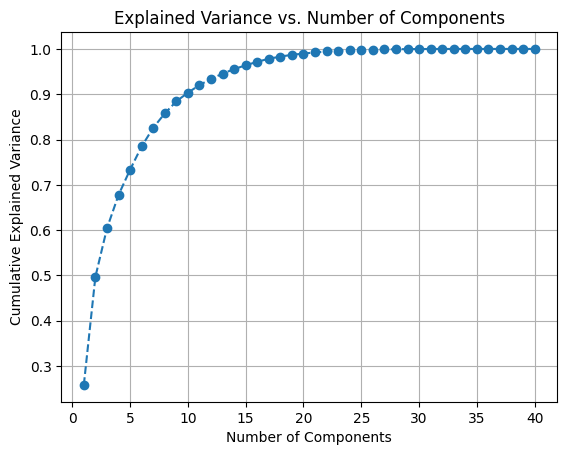

In [ ]:
# Initialize PCA with a large number of components
pca = PCA()

# Fit PCA to your data
pca.fit(X_selected)

# Plot the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio.cumsum(), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid()
plt.show()

In [ ]:
# Initialize PCA with the number of components
n_components = 10  # elbow point of the Graph is 10
pca = PCA(n_components=n_components)

# Fit and transform the data
X_pca = pca.fit_transform(X_selected)

# Create a DataFrame from the PCA-transformed data
X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(n_components)])

In [ ]:
X_pca_df

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0      -1.934828  1.613077  0.925845 -2.130384 -1.007188  6.920310 -1.398248   
1      -1.364425  1.761562  0.801105 -1.435058 -2.078695 -0.585847 -0.300151   
2      -1.371577  1.770406  0.813118 -1.468376 -2.059102 -0.431764 -0.352483   
3      -1.441728  1.708079  0.747433 -1.448376 -1.999410 -0.272575 -0.327692   
4      -1.937855  1.637554  0.938914 -2.127059 -0.996379  6.925949 -1.432577   
...          ...       ...       ...       ...       ...       ...       ...   
195423  2.318472 -2.614287 -3.815129 -1.030504  0.292782  0.326180  0.560644   
195424  0.173852 -3.579399  1.116044  0.115135 -0.175362 -0.122281  0.096288   
195425  0.283561 -3.519672  1.126032 -0.038088 -0.137699 -0.331197 -0.193607   
195426  4.225849 -3.860564 -5.334157 -1.375881  0.969253  0.413453  0.194728   
195427 -1.688004  0.969889 -1.087731 -0.289973 -1.221565  0.204746  1.297554   

             PC8       PC9      PC10  
0      -0.942806 -1.854940  1.113634  
1      -1.317353 -0.913837  0.321090  
2      -1.319290 -0.930514  0.337771  
3      -1.225052 -0.952851  0.344127  
4      -0.935597 -1.809211  1.100247  
...          ...       ...       ...  
195423 -1.333373  0.668395 -0.108004  
195424  0.667395 -0.392181  0.035308  
195425  0.630972 -0.422506  0.072684  
195426 -2.032995  1.246653 -0.204865  
195427 -0.182877 -0.513290  0.226206  

[195428 rows x 10 columns]

# Classification Model **Training**

In [ ]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_pca_df, y, test_size=0.2, random_state=42)

# Define a list of classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Train and evaluate each classifier
for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print(f"Classifier: {name}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Classification Report:\n{report}\n")

Classifier: Random Forest
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19582
           1       1.00      1.00      1.00     19504

    accuracy                           1.00     39086
   macro avg       1.00      1.00      1.00     39086
weighted avg       1.00      1.00      1.00     39086


Classifier: XGBoost
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19582
           1       1.00      1.00      1.00     19504

    accuracy                           1.00     39086
   macro avg       1.00      1.00      1.00     39086
weighted avg       1.00      1.00      1.00     39086




/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classifier: Logistic Regression
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19582
           1       1.00      1.00      1.00     19504

    accuracy                           1.00     39086
   macro avg       1.00      1.00      1.00     39086
weighted avg       1.00      1.00      1.00     39086


Classifier: Support Vector Machine
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19582
           1       1.00      1.00      1.00     19504

    accuracy                           1.00     39086
   macro avg       1.00      1.00      1.00     39086
weighted avg       1.00      1.00      1.00     39086


Classifier: K-Nearest Neighbors
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19582
           1       1.0

# Cross Validation on Different **Classifiers**

In [ ]:
# Define a list of classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Set up cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation for each classifier
for name, classifier in classifiers.items():
    scores = cross_val_score(classifier, X_pca_df, y, cv=cv, scoring='accuracy')

    print(f"Classifier: {name}")
    print(f"Mean Accuracy: {scores.mean():.2f}")
    print(f"Accuracy Std Dev: {scores.std():.2f}")
    print(f"Accuracy Scores: {scores}\n")

Classifier: Random Forest
Mean Accuracy: 1.00
Accuracy Std Dev: 0.00
Accuracy Scores: [0.99989766 0.99997442 0.99994883 0.9998209  0.99997441]

Classifier: XGBoost
Mean Accuracy: 1.00
Accuracy Std Dev: 0.00
Accuracy Scores: [0.99989766 0.99987208 0.99989766 0.99979532 0.99994883]



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Classifier: Logistic Regression
Mean Accuracy: 1.00
Accuracy Std Dev: 0.00
Accuracy Scores: [0.99887428 0.99874635 0.99874635 0.998951   0.99866957]

Classifier: Support Vector Machine
Mean Accuracy: 1.00
Accuracy Std Dev: 0.00
Accuracy Scores: [0.99905337 0.99925805 0.99892545 0.99925803 0.99892542]

Classifier: K-Nearest Neighbors
Mean Accuracy: 1.00
Accuracy Std Dev: 0.00
Accuracy Scores: [0.99969298 0.99994883 0.99984649 0.9998209  0.99987207]

Classifier: Decision Tree
Mean Accuracy: 1.00
Accuracy Std Dev: 0.00
Accuracy Scores: [0.99974415 0.99989766 0.99969298 0.99956505 0.99979532]

Classifier: Naive Bayes
Mean Accuracy: 0.94
Accuracy Std Dev: 0.00
Accuracy Scores: [0.94274165 0.94199969 0.94307425 0.9423564  0.94435205]

Classifier: Gradient Boosting
Mean Accuracy: 1.00
Accuracy Std Dev: 0.00
Accuracy Scores: [0.99953948 0.9996674  0.99969298 0.99966739 0.99961622]



# Deep **Learning**

In [ ]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_pca_df, y, test_size=0.2, random_state=42)

# Build the neural network model
model = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    Dropout(0.2),  # Add dropout with a 20% dropout rate
    keras.layers.Dense(32, activation='relu'),
    Dropout(0.2),  # Add dropout with a 20% dropout rate
    keras.layers.Dense(1, activation='sigmoid')
])



# Compile the model
model.compile(optimizer='adam',               # Optimizer
              loss='binary_crossentropy',    # Loss function for binary classification
              metrics=['accuracy'])          # Evaluation metric

early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=5,           # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore the model weights from the epoch with the best validation loss
)


# Train the model with early stopping
history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_data=(X_test, y_test),
                    verbose=1,
                    callbacks=[early_stopping])

# Evaluate the model on test data
y_pred = (model.predict(X_test) > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Classification Report:\n{report}")

# Plot training history (accuracy and loss over epochs)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Epoch 1/100
4886/4886 [==============================] - 25s 4ms/step - loss: 0.0148 - accuracy: 0.9966 - val_loss: 0.0016 - val_accuracy: 0.9996
Epoch 2/100
4886/4886 [==============================] - 16s 3ms/step - loss: 0.0022 - accuracy: 0.9996 - val_loss: 0.0010 - val_accuracy: 0.9998
Epoch 3/100
4886/4886 [==============================] - 15s 3ms/step - loss: 0.0013 - accuracy: 0.9996 - val_loss: 9.6407e-04 - val_accuracy: 0.9999
Epoch 4/100
4886/4886 [==============================] - 15s 3ms/step - loss: 0.0010 - accuracy: 0.9998 - val_loss: 8.5399e-04 - val_accuracy: 0.9999
Epoch 5/100
4886/4886 [==============================] - 15s 3ms/step - loss: 8.9496e-04 - accuracy: 0.9998 - val_loss: 8.5582e-04 - val_accuracy: 0.9999
Epoch 6/100
4886/4886 [==============================] - 15s 3ms/step - loss: 8.7248e-04 - accuracy: 0.9998 - val_loss: 7.9241e-04 - val_accuracy: 0.9998
Epoch 7/100
4886/4886 [==============================] - 16s 3ms/step - loss: 9.5415e-04 - accuracy:

In [ ]:
git checkout -b main


SyntaxError: invalid syntax (<ipython-input-61-0a3e5ad67f69>, line 1)